In [1]:
pip install --upgrade transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.9 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.8 MB/s eta 0:00:00


In [3]:
import locale

def getpreferredencoding(do_setlocale=True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

# Now you can install transformers
!pip install --upgrade sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=feb6e9f9aa7fe417da59274b6307b5e8f4ebbf3cf989d22831662bef1839e338
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [4]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
import spacy
from collections import Counter
import math
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,precision_recall_fscore_support
import torch
import joblib
import tensorflow as tf
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
#pd.tqdm()

nlp = spacy.load("en_core_web_sm")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
dataset = pd.read_csv("/content/drive/My Drive/Fake.csv")
dataset.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [34]:
dataset.drop(columns=['date','title'], inplace=True)
dataset.head(10)

,text,subject
0,Donald Trump just couldn t wish all Americans ...,News
1,House Intelligence Committee Chairman Devin Nu...,News
2,"On Friday, it was revealed that former Milwauk...",News
3,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis used his annual Christmas Day mes...,News
5,The number of cases of cops brutalizing and ki...,News
6,Donald Trump spent a good portion of his day a...,News
7,In the wake of yet another court decision that...,News
8,Many people have raised the alarm regarding th...,News
9,Just when you might have thought we d get a br...,News


In [35]:
#checking the length of dataset
dataset.shape[0]

23481

In [36]:
dataset.dropna()

,text,subject
0,Donald Trump just couldn t wish all Americans ...,News
1,House Intelligence Committee Chairman Devin Nu...,News
2,"On Friday, it was revealed that former Milwauk...",News
3,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis used his annual Christmas Day mes...,News
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,Middle-east
23477,21st Century Wire says It s a familiar theme. ...,Middle-east
23478,Patrick Henningsen 21st Century WireRemember ...,Middle-east
23479,21st Century Wire says Al Jazeera America will...,Middle-east


In [37]:
dataset = dataset[dataset.text!=" "]
#it is larger than 10,000 there we will use random sampling to bring it down to 10,000
if dataset.shape[0] > 10000:
    dataset = dataset.sample(frac=0.3, replace=True, random_state=1)


In [38]:
print(dataset.shape)
#now we have a dataset with approx. 7000 values
dataset.head(10)

(6856, 2)


,text,subject
235,Sen. Bob Corker (R-TN) is being defended by on...,News
12428,Donald Trump values loyalty in a big way so wh...,politics
5192,"While in Virginia, GOP presidential nominee Do...",News
17766,Beyonce made an attempt to glorify the violent...,left-news
10956,Thanks to Judicial Watch for keeping it up wit...,politics
7813,"Once again, Bette Midler has outdone herself i...",News
19881,While the media salivates over the illegal rel...,left-news
22066,21st Century Wire says Back in January of 2016...,US_News
144,"When we talk about getting rid of Trump, we al...",News
21218,These videos are very disturbing. Americans ar...,left-news


In [39]:
def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

dataset['tokens'] = dataset['text'].apply(text_pipeline_spacy)
dataset.head(10)

,text,subject,tokens
235,Sen. Bob Corker (R-TN) is being defended by on...,News,"[sen., bob, corker, r, tn, defend, republican,..."
12428,Donald Trump values loyalty in a big way so wh...,politics,"[donald, trump, value, loyalty, big, way, well..."
5192,"While in Virginia, GOP presidential nominee Do...",News,"[virginia, gop, presidential, nominee, donald,..."
17766,Beyonce made an attempt to glorify the violent...,left-news,"[beyonce, attempt, glorify, violent, black, pa..."
10956,Thanks to Judicial Watch for keeping it up wit...,politics,"[thank, judicial, watch, keep, effort, find, h..."
7813,"Once again, Bette Midler has outdone herself i...",News,"[bette, midler, outdo, lambasting, insane, rig..."
19881,While the media salivates over the illegal rel...,left-news,"[medium, salivate, illegal, release, trump, s,..."
22066,21st Century Wire says Back in January of 2016...,US_News,"[21st, century, wire, say, january, 2016, 21wi..."
144,"When we talk about getting rid of Trump, we al...",News,"[talk, getting, rid, trump, talk, mike, pence,..."
21218,These videos are very disturbing. Americans ar...,left-news,"[video, disturbing, american, head, path, don,..."


In [40]:
def doc_frequency(corpus):
    doc_freq = Counter()
    for d in corpus:
        unique_tokens = set(d)
        for t in unique_tokens:
            doc_freq[t] += 1
          
    return doc_freq

doc_freq = doc_frequency(dataset['tokens'])

In [41]:
def make_vocabulary(corpus):
    unique_tokens = sorted(set( t for token_list in corpus for t in token_list ))
  
    token_to_id = { v:i for i,v in enumerate(unique_tokens)}
  
    return token_to_id

vocab = make_vocabulary(dataset['tokens'])


In [42]:

def make_tfidf_sparse(tokens, vocab, doc_freq, N):
    sparse_vector = {}
    counts = Counter(tokens)
    for t, c in counts.items():
        tf = 1 + math.log10(c) if c > 0 else 0
        idf = math.log10(N / doc_freq[t])
        sparse_vector[vocab[t]] = tf * idf
      
    return sparse_vector
    
dataset['tfidf'] = [make_tfidf_sparse(word, vocab, doc_freq, 6854) for word in dataset['tokens']]


In [43]:
dataset.shape

(6856, 4)

In [44]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
tqdm.pandas()


def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    def preprocess_word(word):
        lemmatized_word = lemmatizer.lemmatize(word)
        stemmed_word = stemmer.stem(lemmatized_word)
        if stemmed_word not in stop_words:
            return stemmed_word
        else:
            return None
            
    df['preprocessed_text'] = df[column_name].progress_apply(lambda x: " ".join([preprocess_word(word) for word in x.split() if preprocess_word(word) is not None]))
    
    return df


In [45]:
preprocess_text(dataset, 'text')

100%|██████████| 6856/6856 [02:00<00:00, 57.06it/s]


,text,subject,tokens,tfidf,preprocessed_text
235,Sen. Bob Corker (R-TN) is being defended by on...,News,"[sen., bob, corker, r, tn, defend, republican,...","{43841: 1.7278826220340566, 11869: 1.932854113...",sen. bob corker (r-tn) defend one hi republica...
12428,Donald Trump values loyalty in a big way so wh...,politics,"[donald, trump, value, loyalty, big, way, well...","{18356: 0.3926811126351531, 48860: 0.446163556...",donald trump valu loyalti big way better hi in...
5192,"While in Virginia, GOP presidential nominee Do...",News,"[virginia, gop, presidential, nominee, donald,...","{50956: 2.360289094191054, 23023: 0.9377676165...","virginia, gop presidenti nomine donald trump l..."
17766,Beyonce made an attempt to glorify the violent...,left-news,"[beyonce, attempt, glorify, violent, black, pa...","{11419: 2.659852841038167, 10202: 0.9460823788...",beyonc made attempt glorifi violent black pant...
10956,Thanks to Judicial Watch for keeping it up wit...,politics,"[thank, judicial, watch, keep, effort, find, h...","{47647: 1.1166128131101214, 28709: 3.777037713...",thank judici watch keep effort find happen ben...
...,...,...,...,...,...
22938,21st Century Wire says This is why nobody take...,Middle-east,"[21st, century, wire, say, take, mainstream, m...","{3261: 1.6095739341667623, 13680: 1.5082196605...",21st centuri wire say thi whi nobodi take main...
15020,Our vision of the world ? Where are the Catho...,politics,"[vision, world, catholics, scam, catholic, chu...","{50978: 2.8237607287063287, 52340: 1.160445065...",vision world ? cathol thi scam? cathol church ...
22488,Shawn Helton 21st Century WireOn the eve of th...,US_News,"[shawn, helton, 21st, century, wireon, eve, 15...","{44184: 2.839799266283599, 24505: 2.4209707521...",shawn helton 21st centuri wireon eve 15th anni...
15417,"Once again, a great opening statement from Jud...",politics,"[great, opening, statement, judge, jeanine, nail]","{23277: 0.7910125539446881, 35567: 1.972621239...","onc again, great open statement judg jeanin na..."


In [46]:
dataset.drop(columns=['text'], inplace=True)
dataset = dataset.rename(columns={"preprocessed_text": "text"})
dataset = dataset[["text", "subject","tfidf"]]
dataset.head()

,text,subject,tfidf
235,sen. bob corker (r-tn) defend one hi republica...,News,"{43841: 1.7278826220340566, 11869: 1.932854113..."
12428,donald trump valu loyalti big way better hi in...,politics,"{18356: 0.3926811126351531, 48860: 0.446163556..."
5192,"virginia, gop presidenti nomine donald trump l...",News,"{50956: 2.360289094191054, 23023: 0.9377676165..."
17766,beyonc made attempt glorifi violent black pant...,left-news,"{11419: 2.659852841038167, 10202: 0.9460823788..."
10956,thank judici watch keep effort find happen ben...,politics,"{47647: 1.1166128131101214, 28709: 3.777037713..."


In [47]:
label_map = {'Government News': 0, 'Middle-east': 1, 'News': 2, 'US_News': 3, 'left-news': 4, 'politics': 5}
dataset['label_num'] = dataset['subject'].map(label_map)
dataset.head()

,text,subject,tfidf,label_num
235,sen. bob corker (r-tn) defend one hi republica...,News,"{43841: 1.7278826220340566, 11869: 1.932854113...",2
12428,donald trump valu loyalti big way better hi in...,politics,"{18356: 0.3926811126351531, 48860: 0.446163556...",5
5192,"virginia, gop presidenti nomine donald trump l...",News,"{50956: 2.360289094191054, 23023: 0.9377676165...",2
17766,beyonc made attempt glorifi violent black pant...,left-news,"{11419: 2.659852841038167, 10202: 0.9460823788...",4
10956,thank judici watch keep effort find happen ben...,politics,"{47647: 1.1166128131101214, 28709: 3.777037713...",5


In [48]:
train, validate, test = \
              np.split(dataset.sample(frac=1, random_state=42), 
                       [int(.6*len(dataset)), int(.8*len(dataset))])

print(train.shape)
print(validate.shape)
print(test.shape)

(4113, 4)
(1371, 4)
(1372, 4)


In [49]:
train = train.reset_index(drop = True)
validate = validate.reset_index(drop=True)
test = test.reset_index(drop = True)

print(train.head(10))
print(validate.head(10))
print(test.head(10))

                                                text    subject  \
0  befor leak tape donald trump describ hi propen...       News   
1  thi video brilliantli dispel everi one hillari...   politics   
2  hillari clinton told trevor noah daili show co...   politics   
3  thi pastor church heavili tax thi kind polit s...       News   
4  video veri disturbing. american head thi path ...  left-news   
5  ultim gun control end game barack obama hi reg...   politics   
6  believ wa spot special section behind hillari ...  left-news   
7  despit ani time attend critic press conference...       News   
8  close election, upon find lost popular vote, d...       News   
9  gop ha absolut obsess block presid barack obam...       News   

                                               tfidf  label_num  
0  {30072: 1.4974876064892433, 47240: 1.718672804...          2  
1  {50819: 0.651536614681528, 12449: 2.4935214192...          5  
2  {24775: 0.8227288582535509, 14470: 1.032516587...          5 

In [ ]:
train_label_counts = train.groupby('subject').count()
train_label_counts

In [ ]:
validate_label_counts = validate.groupby('subject').count()
validate_label_counts

In [115]:
test_label_counts = test.groupby('subject').count()
test_label_counts

,text,label_num
subject,,
Government News,103,103
Middle-east,40,40
News,556,556
US_News,44,44
left-news,236,236
politics,393,393


In [50]:
def find_centroid(tfidfs):
    
    centroid = dict()
    
    for tfidf in tfidfs:
        for key in tfidf.keys():
            centroid[key] = centroid.get(key,0) + tfidf[key]
    
#   print(centroid)
    centroid = {key:(value/len(tfidfs)) for key, value in centroid.items()}
    
    if(len(centroid)==0):
        print(centroid)
    
    return centroid

def sparse_cosine_similarity(sv1, sv2):
    d1 = math.sqrt( sum( val*val for index,val in sv1.items() ) )
    d2 = math.sqrt( sum( val*val for index,val in sv2.items() ) )
    
#     print(d1, d2)
    return sparse_dot_prod(sv1,sv2) / (d1*d2)

def sparse_dot_prod(sv1, sv2):
    dot_prod = 0
    indices = set(sv1).intersection(sv2)
    for i in indices:
        dot_prod += sv1.get(i,0) * sv2.get(i,0)
    return dot_prod

def kmeans(tfidfs, k, max_iters=100):
    
    #initial centroids
    centroids = np.random.choice(tfidfs, k)
    
    
    prev_tfidf_belongs = dict()
    
    for i in range(max_iters):
        
        print(i)
        tfidf_belongs = dict()
        for tfidf_ind in range(len(tfidfs)):
            
            #find distance of tfidf_ind with all centroids
            centroid_distances = list()
            for centroid in centroids:
                centroid_distances.append(sparse_cosine_similarity(centroid, tfidfs[tfidf_ind]))
            
            tfidf_belongs[tfidf_ind] = centroid_distances.index(min(centroid_distances))
        
        compare_belongs = [key for key in tfidf_belongs.keys() if tfidf_belongs[key]!=prev_tfidf_belongs.get(key,None)]
#         print(compare_belongs)
        if(len(compare_belongs) == 0):
            return (centroids, prev_tfidf_belongs)
            
        prev_tfidf_belongs = tfidf_belongs
            
        for centroid in range(len(centroids)):
            bel = [tfidfs[key] for key, item in tfidf_belongs.items() if item==centroid]
            if(len(bel)==0):
                centroids[centroid] = centroids[centroid]
                continue
#             print(len(bel))
            centroids[centroid] = find_centroid(bel)
        
    
    return (centroids, tfidf_belongs)

In [54]:
train

,text,subject,tfidf,label_num
0,befor leak tape donald trump describ hi propen...,News,"{30072: 1.4974876064892433, 47240: 1.718672804...",2
1,thi video brilliantli dispel everi one hillari...,politics,"{50819: 0.651536614681528, 12449: 2.4935214192...",5
2,hillari clinton told trevor noah daili show co...,politics,"{24775: 0.8227288582535509, 14470: 1.032516587...",5
3,thi pastor church heavili tax thi kind polit s...,News,"{36532: 2.6679106684095393, 42866: 0.081424248...",2
4,video veri disturbing. american head thi path ...,left-news,"{50819: 0.651536614681528, 18138: 1.7867260774...",4
...,...,...,...,...
4108,think agre america belief ann romney would mad...,politics,"{47866: 0.5018926597469562, 8611: 1.1157847966...",5
4109,donald trump ha singl mani peopl dure hi campa...,News,"{18356: 0.5800376178003505, 48860: 0.592253188...",2
4110,nordstrom cancel ivanka trump line liber organ...,left-news,"{34753: 4.507460684407103, 13155: 2.1825839921...",4
4111,cnn chri cuomo freak presid donald trump comme...,left-news,"{14590: 1.5646302252905777, 42866: 0.066534533...",4


In [53]:
centroids, tfidf_belongs = kmeans(train['tfidf'], 5, max_iters=3)

# train

0
1
2


In [52]:
kmeans_train = train[['text','label_num']].copy()
kmeans_train['cluster'] = tfidf_belongs.values()
kmeans_train

,text,label_num,cluster
0,befor leak tape donald trump describ hi propen...,2,0
1,thi video brilliantli dispel everi one hillari...,5,0
2,hillari clinton told trevor noah daili show co...,5,0
3,thi pastor church heavili tax thi kind polit s...,2,0
4,video veri disturbing. american head thi path ...,4,0
...,...,...,...
4108,think agre america belief ann romney would mad...,5,0
4109,donald trump ha singl mani peopl dure hi campa...,2,0
4110,nordstrom cancel ivanka trump line liber organ...,4,0
4111,cnn chri cuomo freak presid donald trump comme...,4,0


In [56]:
kmeans_train_values = kmeans_train[kmeans_train['cluster'] == 0]
kmeans_train_values

,text,label_num,cluster
0,befor leak tape donald trump describ hi propen...,2,0
1,thi video brilliantli dispel everi one hillari...,5,0
2,hillari clinton told trevor noah daili show co...,5,0
3,thi pastor church heavili tax thi kind polit s...,2,0
4,video veri disturbing. american head thi path ...,4,0
...,...,...,...
4108,think agre america belief ann romney would mad...,5,0
4109,donald trump ha singl mani peopl dure hi campa...,2,0
4110,nordstrom cancel ivanka trump line liber organ...,4,0
4111,cnn chri cuomo freak presid donald trump comme...,4,0


In [58]:
kmeans_train_values = kmeans_train[kmeans_train['cluster'] == 2]
kmeans_train_values

,text,label_num,cluster
150,boom!courtesi of: comicallyincorrect.com,4,2
262,https://www.youtube.com/watch?v=gqxwf-teya,5,2
404,https://www.youtube.com/watch?v=6vn1mabekik,5,2
495,https://www.youtube.com/watch?v=iioeiumawro,4,2
634,https://www.youtube.com/watch?v=8dsddbqf828,4,2
772,https://www.youtube.com/watch?v=8mehk5ewcza,5,2
854,https://www.youtube.com/watch?v=pjeoojypnck,4,2
2241,https://www.youtube.com/watch?v=ism-p8e-d7i,5,2
2614,https://www.youtube.com/watch?time_continue=13...,5,2
2954,https://www.youtube.com/watch?time_continue=2&...,0,2


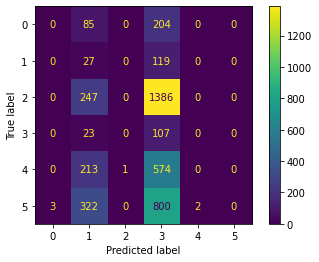

In [ ]:
cm = confusion_matrix(kmeans_train['label_num'], kmeans_train['cluster'])
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# for centroid in range(3):
#     bel = [train['tfidf'][key] for key, item in tfidf_belongs.items() if item==centroid]
#     print(len(bel))

In [ ]:
# print(len(cluster_assignments))

In [46]:
X_test = validate['text']
y_test = validate['subject']
X_train = train['text']
y_train = train['subject']


Dummy Clf with Most Frequent Strategy

In [ ]:

dummy_clf_mf = DummyClassifier(strategy='most_frequent')
dummy_clf_mf.fit(X_train, y_train)
y_pred = dummy_clf_mf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluations
print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")


Accuracy: 0.403
Macro-averaged Precision: 0.067
Macro-averaged Recall: 0.167
Macro-averaged F1: 0.096


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#add results to dataframe
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1'])
results = results.append({'Classifier': 'Dummy Classifier (Most Frequent)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)

<ipython-input-29-82fc7d6af036>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': 'Dummy Classifier (Most Frequent)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


In [ ]:
results

,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807


Dummy clf with Stratified Strategy

In [ ]:

dummy_clf_sf = DummyClassifier(strategy='stratified')
dummy_clf_sf.fit(X_train, y_train)
y_pred = dummy_clf_sf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")


Accuracy: 0.287
Macro-averaged Precision: 0.178
Macro-averaged Recall: 0.179
Macro-averaged F1: 0.178


In [ ]:
results = results.append({'Classifier': 'Dummy Classifier (Stratified)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
results

<ipython-input-32-9a6a9ad9c527>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': 'Dummy Classifier (Stratified)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.286652,0.177816,0.178903,0.178048


In [ ]:
# Vectorize the input data
cv = CountVectorizer(binary=True)
X_train_cv = cv.fit_transform(train['text'])
X_val_cv = cv.transform(validate['text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the label column and transform the labels to numeric values
y_train_le = le.fit_transform(train['subject'])
y_val_le = le.transform(validate['subject'])


1371


Logistic Regression with One-Hot Encoding

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_cv, y_train_le)

y_val_pred = lr.predict(X_val_cv)

accuracy = accuracy_score(y_val_le, y_val_pred)
precision = precision_score(y_val_le, y_val_pred, average='macro')
recall = recall_score(y_val_le, y_val_pred, average='macro')
f1 = f1_score(y_val_le, y_val_pred, average='macro')


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

Accuracy: 0.679
Macro-averaged Precision: 0.524
Macro-averaged Recall: 0.503
Macro-averaged F1: 0.511


In [ ]:
results = results.append({'Classifier': 'Logistic Regression (one-hot)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
results

<ipython-input-36-b0d86dbc2259>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': 'Logistic Regression (one-hot)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.286652,0.177816,0.178903,0.178048
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235


Logistic Regression with TFIDF Vectorization

In [47]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr2', LogisticRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

Accuracy: 0.667
Macro-averaged Precision: 0.598
Macro-averaged Recall: 0.432
Macro-averaged F1: 0.450


In [ ]:
results = results.append({'Classifier': 'Logistic Regression (tfidf)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
results

<ipython-input-38-a4f88aa23018>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': 'Logistic Regression (tfidf)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.286652,0.177816,0.178903,0.178048
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235
3,Logistic Regression (tfidf),0.667396,0.597516,0.431578,0.450461


SVC clf with one-hot vectorization

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_oh = encoder.fit_transform(train[['text']])
X_val_oh = encoder.transform(validate[['text']])

clf_svc = SVC(kernel='rbf')
clf_svc.fit(X_train_oh, y_train)
y_val_pred = clf_svc.predict(X_val_oh)

#Calculate metrics
accuracy = accuracy_score(y_test, y_val_pred)
precision = precision_score(y_test, y_val_pred, average='macro')
recall = recall_score(y_test, y_val_pred, average='macro')
f1 = f1_score(y_test, y_val_pred, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

Accuracy: 0.489
Macro-averaged Precision: 0.517
Macro-averaged Recall: 0.245
Macro-averaged F1: 0.233


In [ ]:
results = results.append({'Classifier': 'SVC classifier (one-hot vectorization)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
results

<ipython-input-40-b864174e947b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': 'SVC classifier (one-hot vectorization)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.286652,0.177816,0.178903,0.178048
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235
3,Logistic Regression (tfidf),0.667396,0.597516,0.431578,0.450461
4,SVC classifier (one-hot vectorization),0.489424,0.516542,0.244993,0.232514


In [ ]:
results

,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.272064,0.156919,0.156833,0.156784
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235
3,Logistic Regression (tfidf),0.667396,0.597516,0.431578,0.450461
4,SVC classifier (one-hot vectorization),0.489424,0.516542,0.244993,0.232514


Linear SVC clf with TFIDF vectorization

In [ ]:
lsvc = LinearSVC()
vct = TfidfVectorizer()
X_train_tf = vct.fit_transform(train['text'])
X_val_tf = vct.transform(validate['text'])
lsvc.fit(X_train_tf, y_train)

LinearSVC()

In [ ]:
y_val_pred = lsvc.predict(X_val_tf)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_val_pred)
precision = precision_score(y_test, y_val_pred, average='macro')
recall = recall_score(y_test, y_val_pred, average='macro')
f1 = f1_score(y_test, y_val_pred, average='macro')


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

Accuracy: 0.689
Macro-averaged Precision: 0.554
Macro-averaged Recall: 0.509
Macro-averaged F1: 0.523


In [ ]:
results = results.append({'Classifier': 'Linear SVC classifier (tfidf)' ,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
results

,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.272064,0.156919,0.156833,0.156784
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235
3,Logistic Regression (tfidf),0.667396,0.597516,0.431578,0.450461
4,SVC classifier (one-hot vectorization),0.489424,0.516542,0.244993,0.232514
5,Linear SVC classifier (tfidf),0.688549,0.554097,0.508969,0.522751


In [ ]:
results

,Classifier,Accuracy,Precision,Recall,F1
0,Dummy Classifier (Most Frequent),0.403355,0.067226,0.166667,0.095807
1,Dummy Classifier (Stratified),0.272064,0.156919,0.156833,0.156784
2,Logistic Regression (one-hot),0.679066,0.524375,0.502612,0.511235
3,Logistic Regression (tfidf),0.667396,0.597516,0.431578,0.450461
4,SVC classifier (one-hot vectorization),0.489424,0.516542,0.244993,0.232514
5,Linear SVC classifier (tfidf),0.688549,0.554097,0.508969,0.522751


### Parameter Tuning

In [48]:
# Define the grid of parameters to search over
param_grid = {
    'tfidf__sublinear_tf': [True, False],
    'tfidf__max_features': [None, 1000, 5000, 10000, 20000, 40000, 50000]
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr2', LogisticRegression())
])

# Tune the sublinear_tf parameter
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score for the sublinear_tf parameter
print("Best parameters for sublinear_tf:", grid_search.best_params_)
print("Validation accuracy for best sublinear_tf:", grid_search.best_score_)



Best parameters for sublinear_tf: {'tfidf__max_features': 5000, 'tfidf__sublinear_tf': True}
Validation accuracy for best sublinear_tf: 0.6652035606483904


In [49]:
param_grid = {
    'lr2__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=grid_search.best_params_['tfidf__max_features'],sublinear_tf=grid_search.best_params_['tfidf__sublinear_tf'])),
    ('lr2', LogisticRegression())
])

# Tune the C parameter
grid_search1 = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search1.fit(X_train, y_train)

# Get the best parameters and score for the C parameter
print("Best parameters for C:", grid_search1.best_params_)
print("Validation accuracy for best C:", grid_search1.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters for C: {'lr2__C': 10}
Validation accuracy for best C: 0.6836811499085005


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
param_grid = {
    'lr2__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=grid_search.best_params_['tfidf__max_features'],sublinear_tf=grid_search.best_params_['tfidf__sublinear_tf'])),
    ('lr2', LogisticRegression(C=grid_search1.best_params_['lr2__C']))
])

# Tune the solver parameter
grid_search2 = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search2.fit(X_train, y_train)

# Get the best parameters and score for the solver parameter
print("Best parameters for solver:", grid_search2.best_params_)
print("Validation accuracy for best solver:", grid_search2.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters for solver: {'lr2__solver': 'liblinear'}
Validation accuracy for best solver: 0.6858679745634185


In [ ]:
# Best parameters for sublinear_tf: {'tfidf__max_features': 5000, 'tfidf__sublinear_tf': True}
# Best parameters for max_features: {'tfidf__max_features': 5000, 'tfidf__sublinear_tf': True}
# Best parameters for C: {'lr__C': 10}
# Best parameters for solver: {'lr2__solver': 'liblinear'}

In [51]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=grid_search.best_params_['tfidf__max_features'],sublinear_tf=grid_search.best_params_['tfidf__sublinear_tf'])),
    ('lr_best', LogisticRegression(C=grid_search1.best_params_['lr2__C'], solver=grid_search2.best_params_['lr2__solver']))
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

                 precision    recall  f1-score   support

Government News       0.42      0.20      0.27        79
    Middle-east       0.51      0.41      0.45        54
           News       0.95      1.00      0.98       553
        US_News       0.50      0.47      0.49        53
      left-news       0.46      0.39      0.42       262
       politics       0.56      0.67      0.61       370

       accuracy                           0.70      1371
      macro avg       0.57      0.52      0.54      1371
   weighted avg       0.69      0.70      0.69      1371

Accuracy: 0.703
Macro-averaged Precision: 0.569
Macro-averaged Recall: 0.523
Macro-averaged F1: 0.537


In [ ]:
def extract_roberta_features(texts):
    tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
    features = []
    for text in texts:
        encoding = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        output = model(**encoding)
        features.append(output.last_hidden_state[:, 0, :].detach().numpy())
    return np.vstack(features)


In [ ]:
from transformers import pipeline, RobertaModel, RobertaTokenizer
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")
nlp_features = pipeline('feature-extraction', model="roberta-base", device = 0)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaMod

RuntimeError: ignored

In [ ]:
X_train = np.array([nlp_features("[CLS]" + text, padding='max_length', max_length=1024, truncation=True)[0][0] for text in X_train])
X_test = np.array([nlp_features("[CLS]" + text, padding='max_length', max_length=1024, truncation=True)[0][0] for text in X_test])
# Train a logistic regression classifier on the extracted features
lr_ml = LogisticRegression(random_state=42)
lr_ml.fit(X_train, y_train)
y_pred = lr_ml.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/transformers/pipelines/base.py:1045: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


                 precision    recall  f1-score   support

Government News       0.55      0.14      0.22        79
    Middle-east       0.30      0.17      0.21        54
           News       0.78      0.94      0.85       553
        US_News       0.35      0.15      0.21        53
      left-news       0.40      0.18      0.24       262
       politics       0.51      0.71      0.59       370

       accuracy                           0.62      1371
      macro avg       0.48      0.38      0.39      1371
   weighted avg       0.58      0.62      0.58      1371



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from transformers import pipeline, RobertaForSequenceClassification, RobertaTokenizerFast, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import TrainingArguments, Trainer
from datasets import Dataset
from transformers import AutoTokenizer
# Define the model and tokenizer
#max_seq_length = max(len(tokenizer.encode(text)) for text in train['text'])
model_name = 'roberta-base'
tokenizer = RobertaTokenizerFast.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=6)

#Tokenize the input data
train_encodings = tokenizer(list(train['text']),padding=True, truncation=True,max_length=256)
val_encodings = tokenizer(list(validate['text']), padding=True,truncation=True, max_length = 256)

# train_labels = torch.tensor(train['subject'].tolist())
# val_labels = torch.tensor(validate['subject'].tolist())

train_encodings['labels'] = train['label_num'].tolist()
val_encodings['labels'] = validate['label_num'].tolist()

print(train_encodings['labels'])
print(train_encodings['input_ids'])
# Convert the encoded data to a dictionary
train_dict = {key: value for key, value in train_encodings.items()}
val_dict = {key: value for key, value in val_encodings.items()}

# Create the Dataset object
train_dataset = Dataset.from_dict(train_dict)
val_dataset = Dataset.from_dict(val_dict)

print(train_dataset)
print(val_dataset)

training_args = TrainingArguments(
    output_dir="model_1", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=1e-4, # Hyperparameter
    per_device_train_batch_size=16, # Hyperparameter
    per_device_eval_batch_size=16, # Hyperparameter
    num_train_epochs=1, # Hyperparameter
    weight_decay=0.0, # Hyperparameter
)



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 4113
})
Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1371
})


In [ ]:
from torch.utils.data.dataloader import default_collate
import torch
from torch.utils.data import TensorDataset
from transformers import default_data_collator

data_collator = default_data_collator

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# Train the model
trainer.train()



***** Running training *****
  Num examples = 4113
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 258
  Number of trainable parameters = 124650246


Epoch,Training Loss,Validation Loss
1,No log,1.457132


***** Running Evaluation *****
  Num examples = 1371
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=258, training_loss=1.4658552066300266, metrics={'train_runtime': 199.5975, 'train_samples_per_second': 20.606, 'train_steps_per_second': 1.293, 'total_flos': 541107318187008.0, 'train_loss': 1.4658552066300266, 'epoch': 1.0})

In [ ]:

# Evaluate the model
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis = -1)
validate_labels = val_dataset['labels']
accuracy = accuracy_score(validate_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(validate_labels,predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

***** Running Prediction *****
  Num examples = 1371
  Batch size = 16


Accuracy: 0.4033552151714077
Precision: 0.16269542960597264
Recall: 0.4033552151714077
F1 Score: 0.23186635549874063


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Training more end-to-end models with different parameters


In [ ]:
training_args = TrainingArguments(
    output_dir="model_2", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=1e-5, # Hyperparameter
    per_device_train_batch_size=32, # Hyperparameter
    per_device_eval_batch_size=32, # Hyperparameter
    num_train_epochs=2, # Hyperparameter
    weight_decay=0.0, # Hyperparameter
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# Train the model
trainer.train()


# Evaluate the model
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis = -1)
validate_labels = val_dataset['labels']
accuracy = accuracy_score(validate_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(validate_labels,predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4113
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 258
  Number of trainable parameters = 124650246


Epoch,Training Loss,Validation Loss
1,No log,1.436965
2,No log,1.175844


***** Running Evaluation *****
  Num examples = 1371
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1371
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1371
  Batch size = 32


Accuracy: 0.5572574762946754
Precision: 0.38346937844570533
Recall: 0.5572574762946754
F1 Score: 0.45359000617128614


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from transformers import default_data_collator

data_collator = default_data_collator

training_args = TrainingArguments(
    output_dir="model_3", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=1e-6, # Hyperparameter
    per_device_train_batch_size=4, # Hyperparameter
    per_device_eval_batch_size=4, # Hyperparameter
    num_train_epochs=3, # Hyperparameter
    weight_decay=0.0, # Hyperparameter
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# Train the model
trainer.train()


# Evaluate the model
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis = -1)
validate_labels = val_dataset['labels']
accuracy = accuracy_score(validate_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(validate_labels,predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.362600,1.250309
2,1.214200,1.142811
3,1.152400,1.120643


Accuracy: 0.5681983953318746
Precision: 0.478799649450555
Recall: 0.5681983953318746
F1 Score: 0.48453361554423185


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from transformers import default_data_collator

data_collator = default_data_collator


training_args = TrainingArguments(
    output_dir="model_4", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=1e-7, # Hyperparameter
    per_device_train_batch_size=8, # Hyperparameter
    per_device_eval_batch_size=8, # Hyperparameter
    num_train_epochs=1, # Hyperparameter
    weight_decay=0.0, # Hyperparameter
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# Train the model
trainer.train()


# Evaluate the model
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis = -1)
validate_labels = val_dataset['labels']
accuracy = accuracy_score(validate_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(validate_labels,predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.140200,1.115578


Accuracy: 0.5689277899343544
Precision: 0.47509120017153394
Recall: 0.5689277899343544
F1 Score: 0.48609696265232033


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
table = {'Classifier 1': [0.557, 0.383, 0.557, 0.453, 'lr=0.00001, epochs=2, batch_size=32'],
           'Classifier 2': [0.568, 0.478, 0.568, 0.484, 'lr=0.000001, epochs=3, batch_size=4'],
           'Classifier 3': [0.568, 0.475, 0.568, 0.486, 'lr=0.0000001, epochs=1, batch_size=8']}

df = pd.DataFrame(table, index=['Accuracy','Precision', 'Recall', 'F1-score','Parameters'])
df

,Classifier 1,Classifier 2,Classifier 3
Accuracy,0.557,0.568,0.568
Precision,0.383,0.478,0.475
Recall,0.557,0.568,0.568
F1-score,0.453,0.484,0.486
Parameters,"lr=0.00001, epochs=2, batch_size=32","lr=0.000001, epochs=3, batch_size=4","lr=0.0000001, epochs=1, batch_size=8"


In [52]:
X_test = test['text']
y_test = test['subject']
X_train = train['text']
y_train = train['subject']


In [53]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=grid_search.best_params_['tfidf__max_features'],sublinear_tf=grid_search.best_params_['tfidf__sublinear_tf'])),
    ('lr_best', LogisticRegression(C=grid_search1.best_params_['lr2__C'], solver=grid_search2.best_params_['lr2__solver']))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.3f}")
print(f"Macro-averaged Precision: {precision:.3f}")
print(f"Macro-averaged Recall: {recall:.3f}")
print(f"Macro-averaged F1: {f1:.3f}")

                 precision    recall  f1-score   support

Government News       0.50      0.19      0.28       103
    Middle-east       0.49      0.45      0.47        40
           News       0.95      0.99      0.97       556
        US_News       0.57      0.52      0.55        44
      left-news       0.43      0.43      0.43       236
       politics       0.59      0.66      0.63       393

       accuracy                           0.71      1372
      macro avg       0.59      0.54      0.55      1372
   weighted avg       0.70      0.71      0.70      1372

Accuracy: 0.711
Macro-averaged Precision: 0.590
Macro-averaged Recall: 0.542
Macro-averaged F1: 0.554


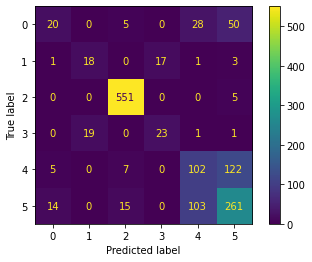

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


# 'Government News': 0, 
# 'Middle-east': 1, 
# 'News': 2, 
# 'US_News': 3, 
# 'left-news': 4, 
# 'politics': 5

In [63]:
res = test.copy()
res['y_pred'] = y_pred


,text,subject,label_num,y_pred
0,nice threat potus: intellig commun continu con...,left-news,4,politics
1,saturday night live onc took aim donald trump....,News,2,News
2,"wednesday, gop rep. kevin cramer open hi mouth...",News,2,News
3,brilliant brilliant rememb disney espn punish ...,politics,5,left-news
4,"septemb 2016, stephen henderson, editori edito...",left-news,4,politics
...,...,...,...,...
195,bill gonna wish hi corrupt wife never ran pres...,politics,5,politics
196,republican hawaii punish first femal hous mino...,News,2,News
197,"christian fundament put american child danger,...",News,2,News
198,senat john mccain got bad news tuesday woman l...,News,2,News


In [66]:
for i, row in res.iterrows():
    print(row)
    print('\n')

Streaming output truncated to the last 5000 lines.


text         lead democrat wish hillari would go away, supp...
subject                                               politics
label_num                                                    5
y_pred                                                politics
Name: 658, dtype: object


text         thi man come thi store? inform much thi frauds...
subject                                        Government News
label_num                                                    0
y_pred                                         Government News
Name: 659, dtype: object


text         minnesota governor someth current occup white ...
subject                                                   News
label_num                                                    2
y_pred                                                    News
Name: 660, dtype: object


text         donald trump ha act like noth child ever sinc ...
subject                                        

In [81]:
# Print all rows where subject equals y_pred to manually inspect it
for index, row in res.iterrows():
    if row['subject'] == row['y_pred']:
        print(row)
        print('\n')

Streaming output truncated to the last 5000 lines.


text         mccain: intellig agenc conclud unanim russian ...
subject                                        Government News
label_num                                                    0
y_pred                                         Government News
Name: 378, dtype: object


text         morten storm former cia doubl agent shock inep...
subject                                               politics
label_num                                                    5
y_pred                                                politics
Name: 379, dtype: object


text         #disruptj20 protest block men air forc uniform...
subject                                              left-news
label_num                                                    4
y_pred                                               left-news
Name: 381, dtype: object


text         cnn brian stelter tweet news cnn staffer atten...
subject                                        

In [61]:
# Print all rows where subject is not equal to y_pred to manually inspect the text
for index, row in res.iterrows():
    if row['subject'] != row['y_pred']:
        print(row)
        print('\n')

text         nice threat potus: intellig commun continu con...
subject                                              left-news
label_num                                                    4
y_pred                                                politics
Name: 0, dtype: object


text         brilliant brilliant rememb disney espn punish ...
subject                                               politics
label_num                                                    5
y_pred                                               left-news
Name: 3, dtype: object


text         septemb 2016, stephen henderson, editori edito...
subject                                              left-news
label_num                                                    4
y_pred                                                politics
Name: 4, dtype: object


text         presid trump arriv like bo check go nato headq...
subject                                        Government News
label_num                                  

In [87]:
#printing all rows of left-news that were misclassified as politics
for index, row in res.iterrows():
    if row['subject'] == 'left-news' and row['y_pred'] == 'politics':
        print(test.loc[index]['text'])
        print('\n')

nice threat potus: intellig commun continu convey truth power even power necessarili listen. thi entir video disturb eye opening. feel threaten trump thi clearli effort hurt presid trump. thi come two men ok spi american lie oath:how conveni cnn wolf blitzer host thi bashfest current administr presid trump. iron two men lie oath speak truth power fyi: john brennan liter vote communist parti 1970 dure height cold war lectur u russia.thes two men defin deep state thi talk wa realli creat doubt trump defend themselv post obama. imagin tabl turn thi vitriol wa direct obama? shameful!al listen clapper lie befor congress know ha zero credibl speak:rememb famou moment us nation intellig chief jame clapper wa testifi nsa surveil american let slip sign wa truthful. course, knew thi wa smoke mirror show. clapper later said misspok last check pretti much thing lie wittingli jame clapperher video par word hi testimony: rememb clapper said recent trump:form director nation intellig jame clapper say